### Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import re

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

### Data overview

In [2]:
df_data = pd.read_csv('text_clean.csv')
df_data.head()

,text,text_clean,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung milik usaha pabrik puluh kenal putih ba...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k mmbri hujjah partai diwl...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis jalan sumatra bandung nyaman ...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia unboxing paket barang bagus beli,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,aduh mahasiswa sombong kasih kartu kuning ajar...,negative


### Tokenizing data

In [3]:
df_data['text_clean'][0]

'warung milik usaha pabrik puluh kenal putih bandung kualitas padu ahli masak padu kretivitas warung saji menu utama bahan menu ayam selera indonesia harga jangkau bletoka tidak kalah asli tegal'

In [4]:
# Tokenize pake CountVectorizer
vectorizer = CountVectorizer(decode_error='ignore', lowercase=True, min_df=2)

# Pakai unicode
X = vectorizer.fit_transform(df_data['text_clean'].values.astype('U'))

In [5]:
print(X.shape)

(11000, 5695)


In [6]:
# Ekstrak vocab [list of word] (word, frequency)
vocab = list(vectorizer.vocabulary_.items())
print(vocab[:10])

[('warung', 5573), ('milik', 3237), ('usaha', 5471), ('pabrik', 3599), ('puluh', 4058), ('kenal', 2429), ('putih', 4078), ('bandung', 419), ('kualitas', 2667), ('padu', 3611)]


In [7]:
# Assign data sentimen sebagai target yang mau diprediksi ke dalam variabel y, diubah jadi array
label2id = {'neutral': 0, 'positive': 1, 'negative': 2}
df_data['sentiment'] = df_data['sentiment'].map(label2id) 
y = df_data['sentiment']

In [8]:
# Pakai train_test_split buat bagi data train sama data test
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=123, train_size=0.75, shuffle=True)

In [9]:
print(y_train)

6293    0
1425    0
3216    1
8741    2
2901    1
       ..
9785    2
7763    1
5218    1
1346    1
3582    1
Name: sentiment, Length: 8250, dtype: int64


In [10]:
print('X_train:', X_train.shape)
print('X_val:', X_val.shape)
print('y_train:', y_train.shape)
print('y_val:', y_val.shape)

X_train: (8250, 5695)
X_val: (2750, 5695)
y_train: (8250,)
y_val: (2750,)


### MLP Classifier

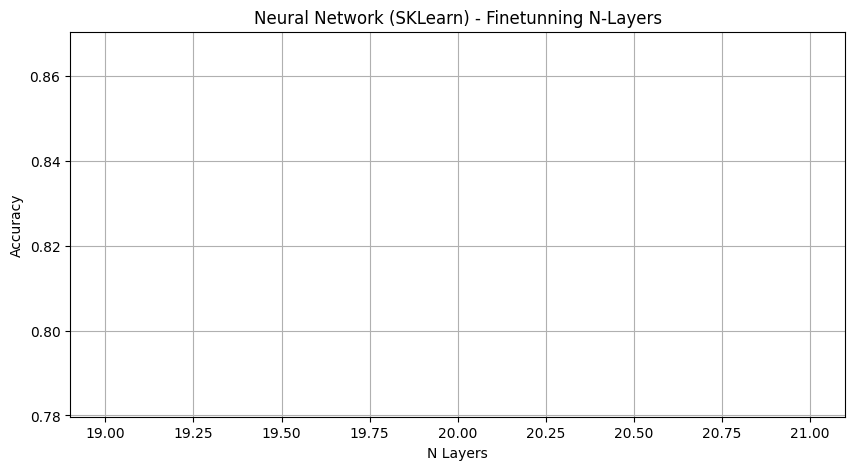

In [12]:
layers = [20]
scores = []
for layer in layers:
    mlp = MLPClassifier (verbose=False, random_state=123, hidden_layer_sizes=layer, max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    scores.append(score)

plt.figure(figsize=(10,5))
plt.title('Neural Network (SKLearn) - Finetunning N-Layers')
plt.plot(layers, scores)
plt.xlabel('N Layers')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [13]:
#SaveModel
import pickle
with open('mlp.pkl', 'wb') as f:
    pickle.dump(mlp, f)

In [14]:
#LoadModel
with open('mlp.pkl', 'rb') as f:
    model_mlp = pickle.load(f)

### Predict

In [22]:
y_pred = mlp.predict(X_val)
score = accuracy_score(y_val, y_pred)
print('Accuracy Score :', round(score, 2))
print(classification_report(y_val,y_pred, zero_division=0.0))

Accuracy Score : 0.83
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       272
           1       0.88      0.88      0.88      1624
           2       0.77      0.77      0.77       854

    accuracy                           0.83      2750
   macro avg       0.77      0.77      0.77      2750
weighted avg       0.83      0.83      0.83      2750



In [35]:
print(y_pred)

[2 2 0 ... 1 0 1]


In [53]:
y_pred_list = list(y_pred)

In [54]:
print(y_pred_list)

[2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 

In [42]:
y_pred_str = str(y_pred_list)

In [36]:
id2label = {0: 'neutral', 1: 'positive', 2: 'negative'}


In [56]:
predicted = list(map(id2label.get, y_pred_list))

In [60]:
print(predicted)

['negative', 'negative', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'negative', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'neutral', 'negative', 'negative', 'negative', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'neutral', 'positive', 'negative', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'neutral', 'positive', 'pos